In [31]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [35]:
x_train[:10]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Forward propogation ANN

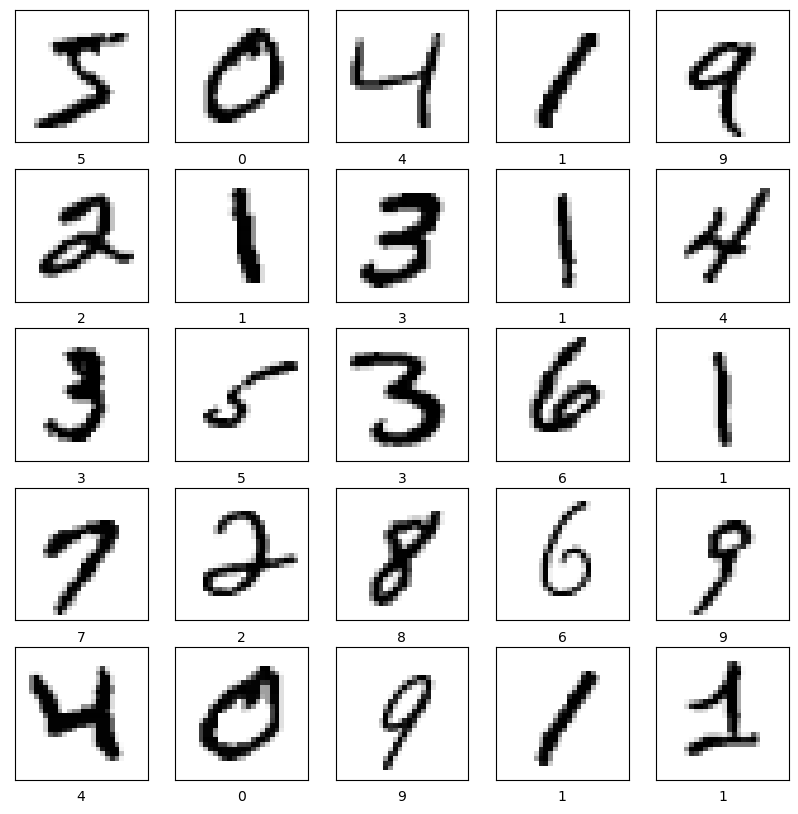

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [37]:
#fig_size = (10, 5)
#f = plt.figure(figsize=fig_size)

def NNlossplot(history, fig = f):   
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    #axarr = fig.add_subplot(1,1,1)
    plt.plot(epoch_count, training_loss, "r--")
    plt.plot(epoch_count, test_loss, "b-")
    plt.legend(["Training Loss", "Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show();


def NNaccuracyplot(history, fig=f):
    # Get training and test accuracy histories
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]
    epoch_count = range(1, len(training_accuracy) + 1)
    plt.plot(epoch_count, training_accuracy, "r--")
    plt.plot(epoch_count, test_accuracy, "b-")

    # Visualize accuracy history
    #axarr = fig.add_subplot(1,1,1)
    plt.legend(["Training Accuracy", "Test Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")
    plt.show();
    #return fig

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4800 - accuracy: 0.8610 - val_loss: 0.4716 - val_accuracy: 0.9000
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3677 - accuracy: 0.9115 - val_loss: 0.3477 - val_accuracy: 0.9206
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.9283 - val_loss: 0.3039 - val_accuracy: 0.9296
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9352 - val_loss: 0.2843 - val_accuracy: 0.9380
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2350 - accuracy: 0.9420 - val_loss: 0.2929 - val_accuracy: 0.9383
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2168 - accuracy: 0.9477 - val_loss: 0.2427 - val_accuracy: 0.9461
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.9507 - val_loss: 0.2448 - val_accuracy:

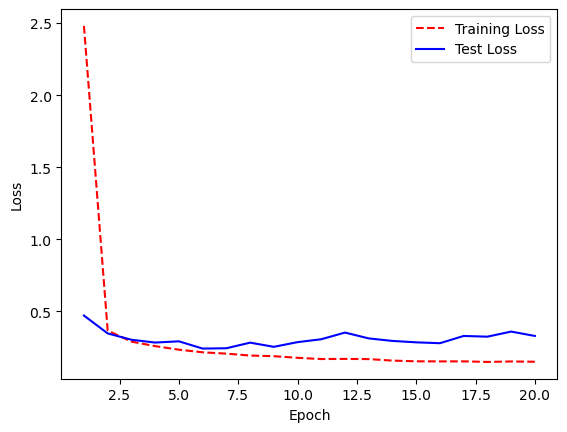

In [40]:
#figloss = 
NNlossplot(history)

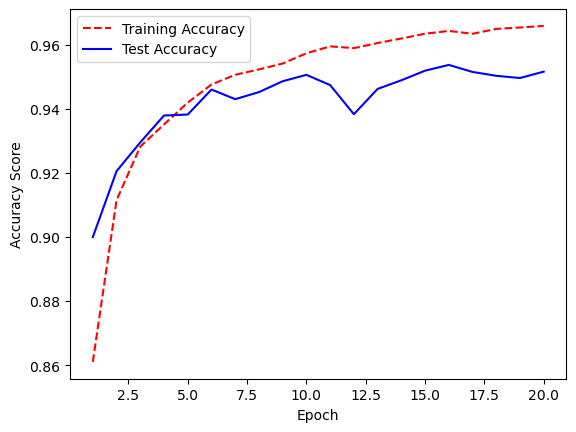

In [41]:
#figacc = 
NNaccuracyplot(history)

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5935 - accuracy: 0.8715 - val_loss: 0.4228 - val_accuracy: 0.9195
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3004 - accuracy: 0.9294 - val_loss: 0.2482 - val_accuracy: 0.9353
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2149 - accuracy: 0.9445 - val_loss: 0.2312 - val_accuracy: 0.9428
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1692 - accuracy: 0.9528 - val_loss: 0.1913 - val_accuracy: 0.9495
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1462 - accuracy: 0.9592 - val_loss: 0.1590 - val_accuracy: 0.9583
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1307 - accuracy: 0.9633 - val_loss: 0.1458 - val_accuracy: 0.9610
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1249 - accuracy: 0.9654 - val_loss: 0.1451 - val_accurac

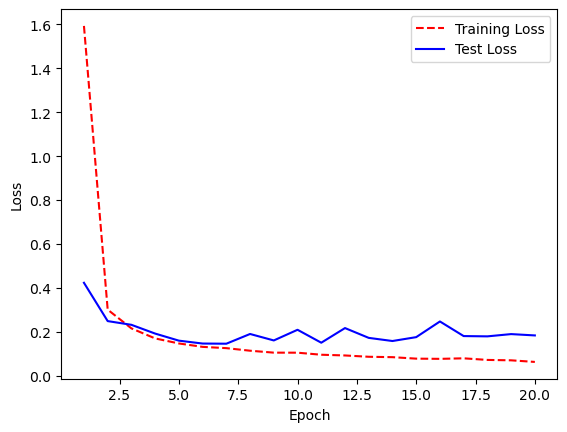

In [44]:
NNlossplot(history)

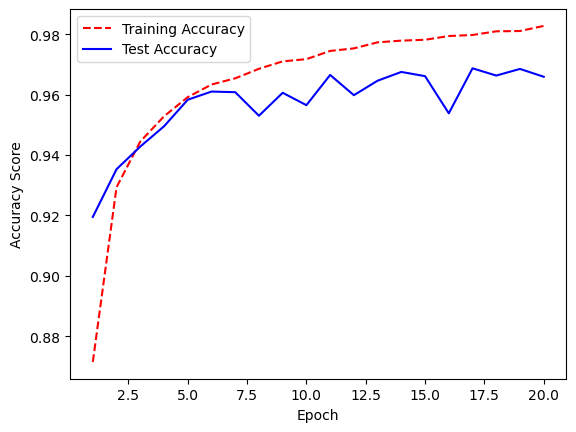

In [45]:
NNaccuracyplot(history)

In [46]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [47]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [48]:
predictions[0]

array([5.7431300e-19, 5.8115988e-06, 1.4370339e-07, 1.6418618e-10,
       1.0138817e-07, 3.4736874e-25, 7.4556653e-14, 9.9999392e-01,
       1.1670234e-12, 3.2991894e-09], dtype=float32)

In [49]:
np.argmax(predictions[0])

7

In [50]:
y_test[0]

7

In [51]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


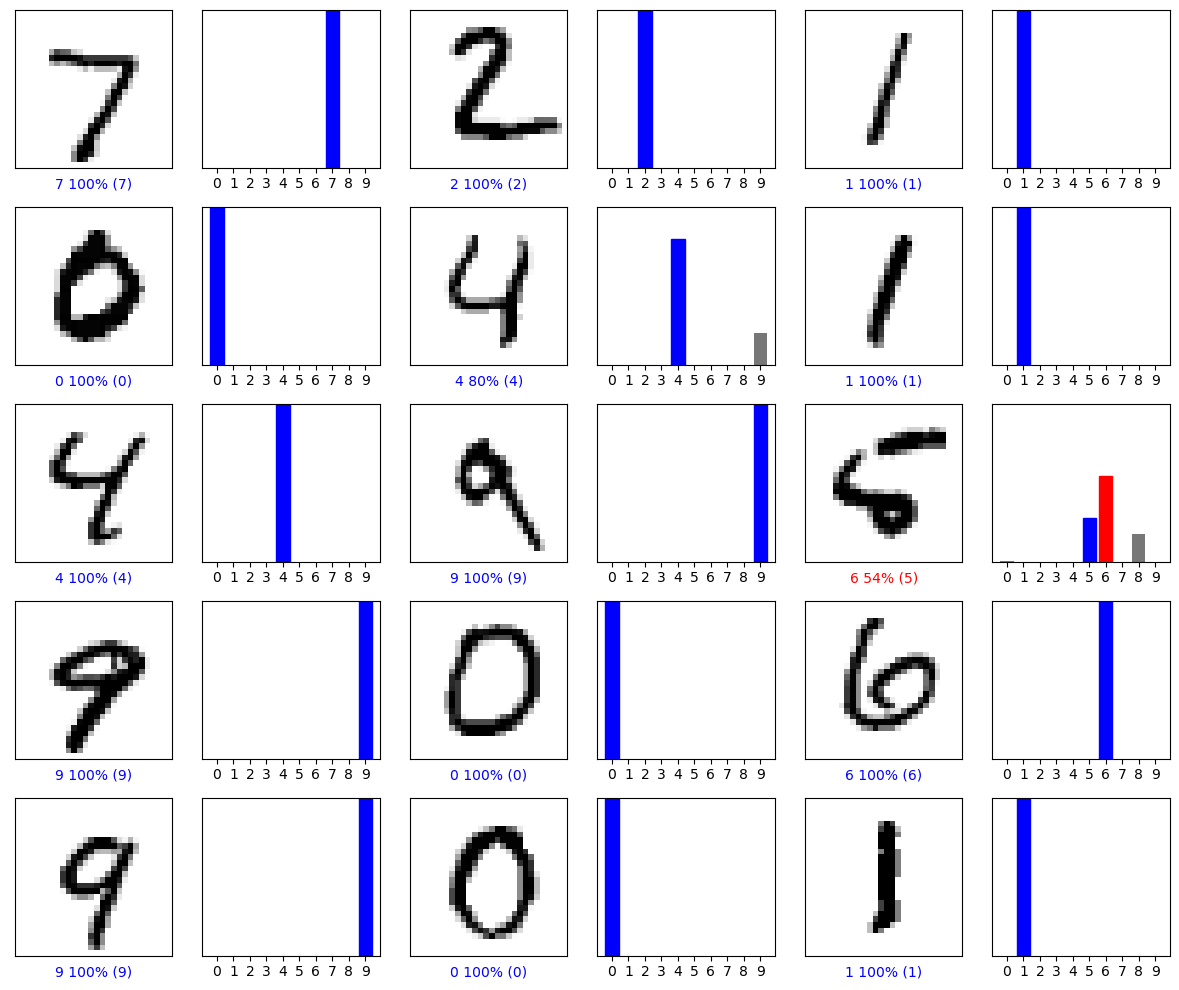

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()


In [56]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


In [57]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [58]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[1.3974585e-16 4.6856184e-16 1.0000000e+00 5.3958095e-16 0.0000000e+00
  1.9569068e-35 2.0827606e-26 1.2047936e-18 5.7544060e-11 5.7820889e-29]]


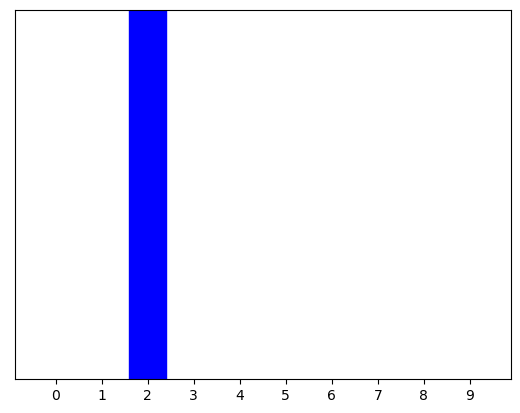

In [59]:
plot_value_array(1, predictions_single[0], y_test)


In [60]:
np.argmax(predictions_single[0])

2

# CNN

In [61]:
model = keras.Sequential([
    keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(1,1)),
# flatten output of conv
    keras.layers.Flatten(),
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 32s 66ms/step - loss: 1.6400 - accuracy: 0.8902 - val_loss: 0.2035 - val_accuracy: 0.9514
Epoch 2/10
469/469 [==============================] - 31s 66ms/step - loss: 0.1723 - accuracy: 0.9552 - val_loss: 0.1441 - val_accuracy: 0.9655
Epoch 3/10
469/469 [==============================] - 31s 67ms/step - loss: 0.1011 - accuracy: 0.9724 - val_loss: 0.1487 - val_accuracy: 0.9665
Epoch 4/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0727 - accuracy: 0.9795 - val_loss: 0.1326 - val_accuracy: 0.9691
Epoch 5/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.1263 - val_accuracy: 0.9735
Epoch 6/10
469/469 [==============================] - 32s 68ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.1236 - val_accuracy: 0.9723
Epoch 7/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.1625 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
NNlossplot(history)

In [ ]:
NNaccuracyplot(history)